# Problem stament
 BoomBikes, a US bike-sharing service, has experienced significant revenue dips due to the Corona pandemic. To accelerate revenue and cater to people's needs, the company has partnered with a consulting company to understand the factors affecting demand for shared bikes in the American market. The company aims to identify significant variables in predicting demand and how well they describe bike demands. The company has gathered a large dataset on daily bike demands across the American market based on meteorological surveys and people's styles. This strategy aims to cater to the needs of the American market and make significant profits.






 ## Business Goal
 Model shared bike demand using independent variables to understand demand variations and customer expectations. This helps management manipulate business strategies and understand demand dynamics in a new market.




In [165]:
from google.colab import files
uploaded = files.upload()

Saving day.csv to day.csv


In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io


df = pd.read_csv(io.BytesIO(uploaded['day.csv']))


## Data Reading,Understanding and Preparation

In [167]:
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [169]:
df.shape

(730, 16)

In [170]:
df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

**Data Cleaning**




In [171]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [172]:
# lets find the single value column

sngl_vl_clm = [col for col in df.columns if df[col].nunique() == 1]

print(sngl_vl_clm)

[]


In [173]:
# lets drop the instant since it's a dataset serial number
# and will drop detday since we have the same in the other formate like yr(year),mnth(month), workday  and weekday like that
df=df.drop(['instant','dteday'],axis=1)

In [174]:
df.shape


(730, 14)

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.0 KB


Feature: The season needs to be encoded using three dummy variables because it has four levels: spring, summer, fall, and winter.

In [176]:
season = pd.get_dummies(df['season'])
season.head()

1      2      3      4
0  True  False  False  False
1  True  False  False  False
2  True  False  False  False
3  True  False  False  False
4  True  False  False  False

In [177]:
season.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       730 non-null    bool 
 1   2       730 non-null    bool 
 2   3       730 non-null    bool 
 3   4       730 non-null    bool 
dtypes: bool(4)
memory usage: 3.0 KB


In [178]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

**Check and Handle outliners**

In [179]:
df.corr()

season            yr          mnth   holiday   weekday  \
season      1.000000e+00 -3.279074e-16  8.310321e-01 -0.010868 -0.003081   
yr         -3.279074e-16  1.000000e+00 -5.162656e-16  0.008195 -0.005466   
mnth        8.310321e-01 -5.162656e-16  1.000000e+00  0.018905  0.009523   
holiday    -1.086804e-02  8.195345e-03  1.890483e-02  1.000000 -0.101962   
weekday    -3.081198e-03 -5.466369e-03  9.522969e-03 -0.101962  1.000000   
workingday  1.376178e-02 -2.945396e-03 -4.687953e-03 -0.252948  0.035800   
weathersit  2.130636e-02 -5.032247e-02  4.561335e-02 -0.034395  0.031112   
temp        3.333607e-01  4.878919e-02  2.190833e-01 -0.028764 -0.000168   
atemp       3.420139e-01  4.721519e-02  2.264302e-01 -0.032703 -0.007539   
hum         2.082196e-01 -1.125471e-01  2.249368e-01 -0.015662 -0.052290   
windspeed  -2.296069e-01 -1.162435e-02 -2.080131e-01  0.006257  0.014283   
casual      2.087373e-01  2.505017e-01  1.212079e-01  0.054055  0.059978   
registered  4.103102e-01  5.969106e-01  2.919516e-01 -0.109142  0.057427   
cnt         4.045838e-01  5.697285e-01  2.781909e-01 -0.068764  0.067534   

            workingday  weathersit      temp     atemp       hum  windspeed  \
season        0.013762    0.021306  0.333361  0.342014  0.208220  -0.229607   
yr           -0.002945   -0.050322  0.048789  0.047215 -0.112547  -0.011624   
mnth         -0.004688    0.045613  0.219083  0.226430  0.224937  -0.208013   
holiday      -0.252948   -0.034395 -0.028764 -0.032703 -0.015662   0.006257   
weekday       0.035800    0.031112 -0.000168 -0.007539 -0.052290   0.014283   
workingday    1.000000    0.060236  0.053470  0.052940  0.023202  -0.018666   
weathersit    0.060236    1.000000 -0.119503 -0.120559  0.590277   0.039769   
temp          0.053470   -0.119503  1.000000  0.991696  0.128565  -0.158186   
atemp         0.052940   -0.120559  0.991696  1.000000  0.141512  -0.183876   
hum           0.023202    0.590277  0.128565  0.141512  1.000000  -0.248506   
windspeed    -0.018666    0.039769 -0.158186 -0.183876 -0.248506   1.000000   
casual       -0.517607   -0.246044  0.542731  0.543362 -0.075211  -0.167995   
registered    0.305437   -0.259025  0.539436  0.543678 -0.089212  -0.217914   
cnt           0.062542   -0.295929  0.627044  0.630685 -0.098543  -0.235132   

              casual  registered       cnt  
season      0.208737    0.410310  0.404584  
yr          0.250502    0.596911  0.569728  
mnth        0.121208    0.291952  0.278191  
holiday     0.054055   -0.109142 -0.068764  
weekday     0.059978    0.057427  0.067534  
workingday -0.517607    0.305437  0.062542  
weathersit -0.246044   -0.259025 -0.295929  
temp        0.542731    0.539436  0.627044  
atemp       0.543362    0.543678  0.630685  
hum        -0.075211   -0.089212 -0.098543  
windspeed  -0.167995   -0.217914 -0.235132  
casual      1.000000    0.394137  0.672123  
registered  0.394137    1.000000  0.945411  
cnt         0.672123    0.945411  1.000000

So from the above correlation formed we can clearly see that season,month and weekday which are supposed to be non-numerical are numerical which should be changed

In [180]:
# unique values present in data
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

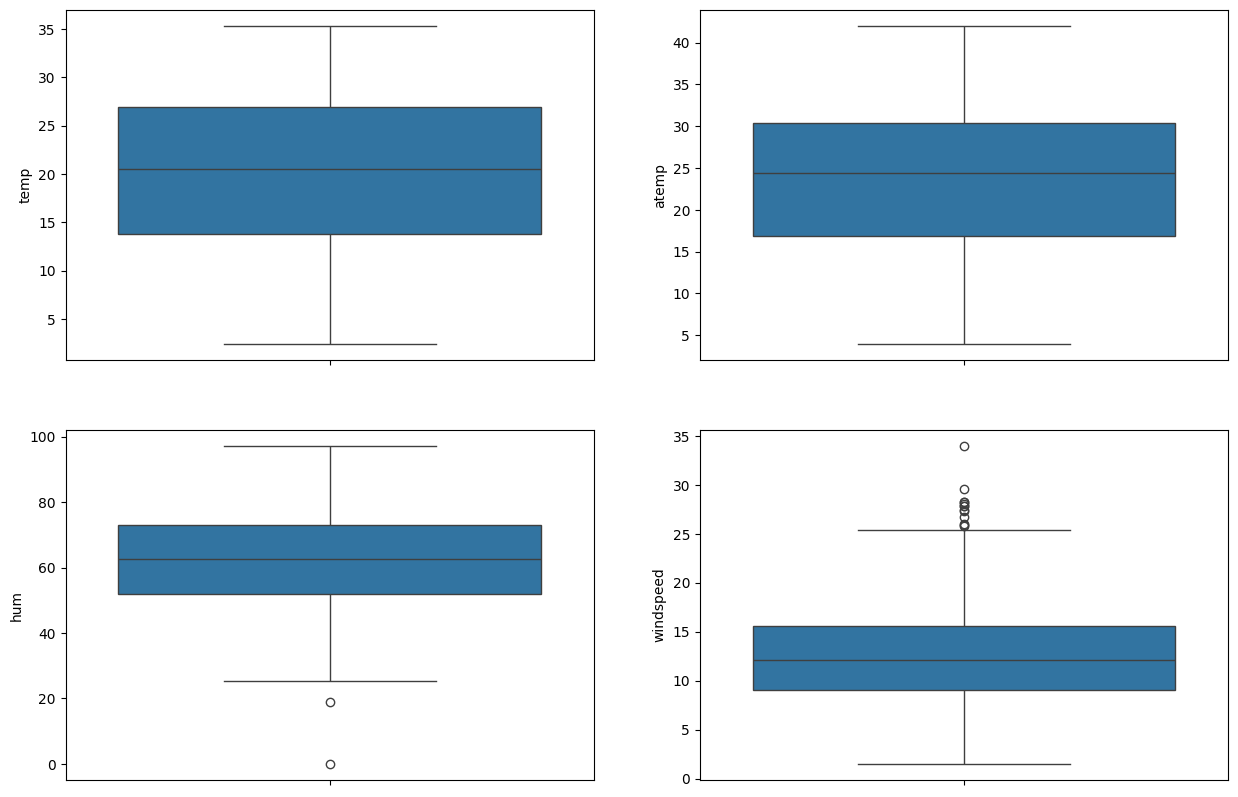

In [181]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(df['temp'])
plt.subplot(2,2,2)
sns.boxplot(df['atemp'])
plt.subplot(2,2,3)
sns.boxplot(df['hum'])
plt.subplot(2,2,4)
sns.boxplot(df['windspeed'])
plt.show()

## Exploratory data analysis

Data visualization to identify relationships between numerical variables

<Figure size 1500x1000 with 0 Axes>

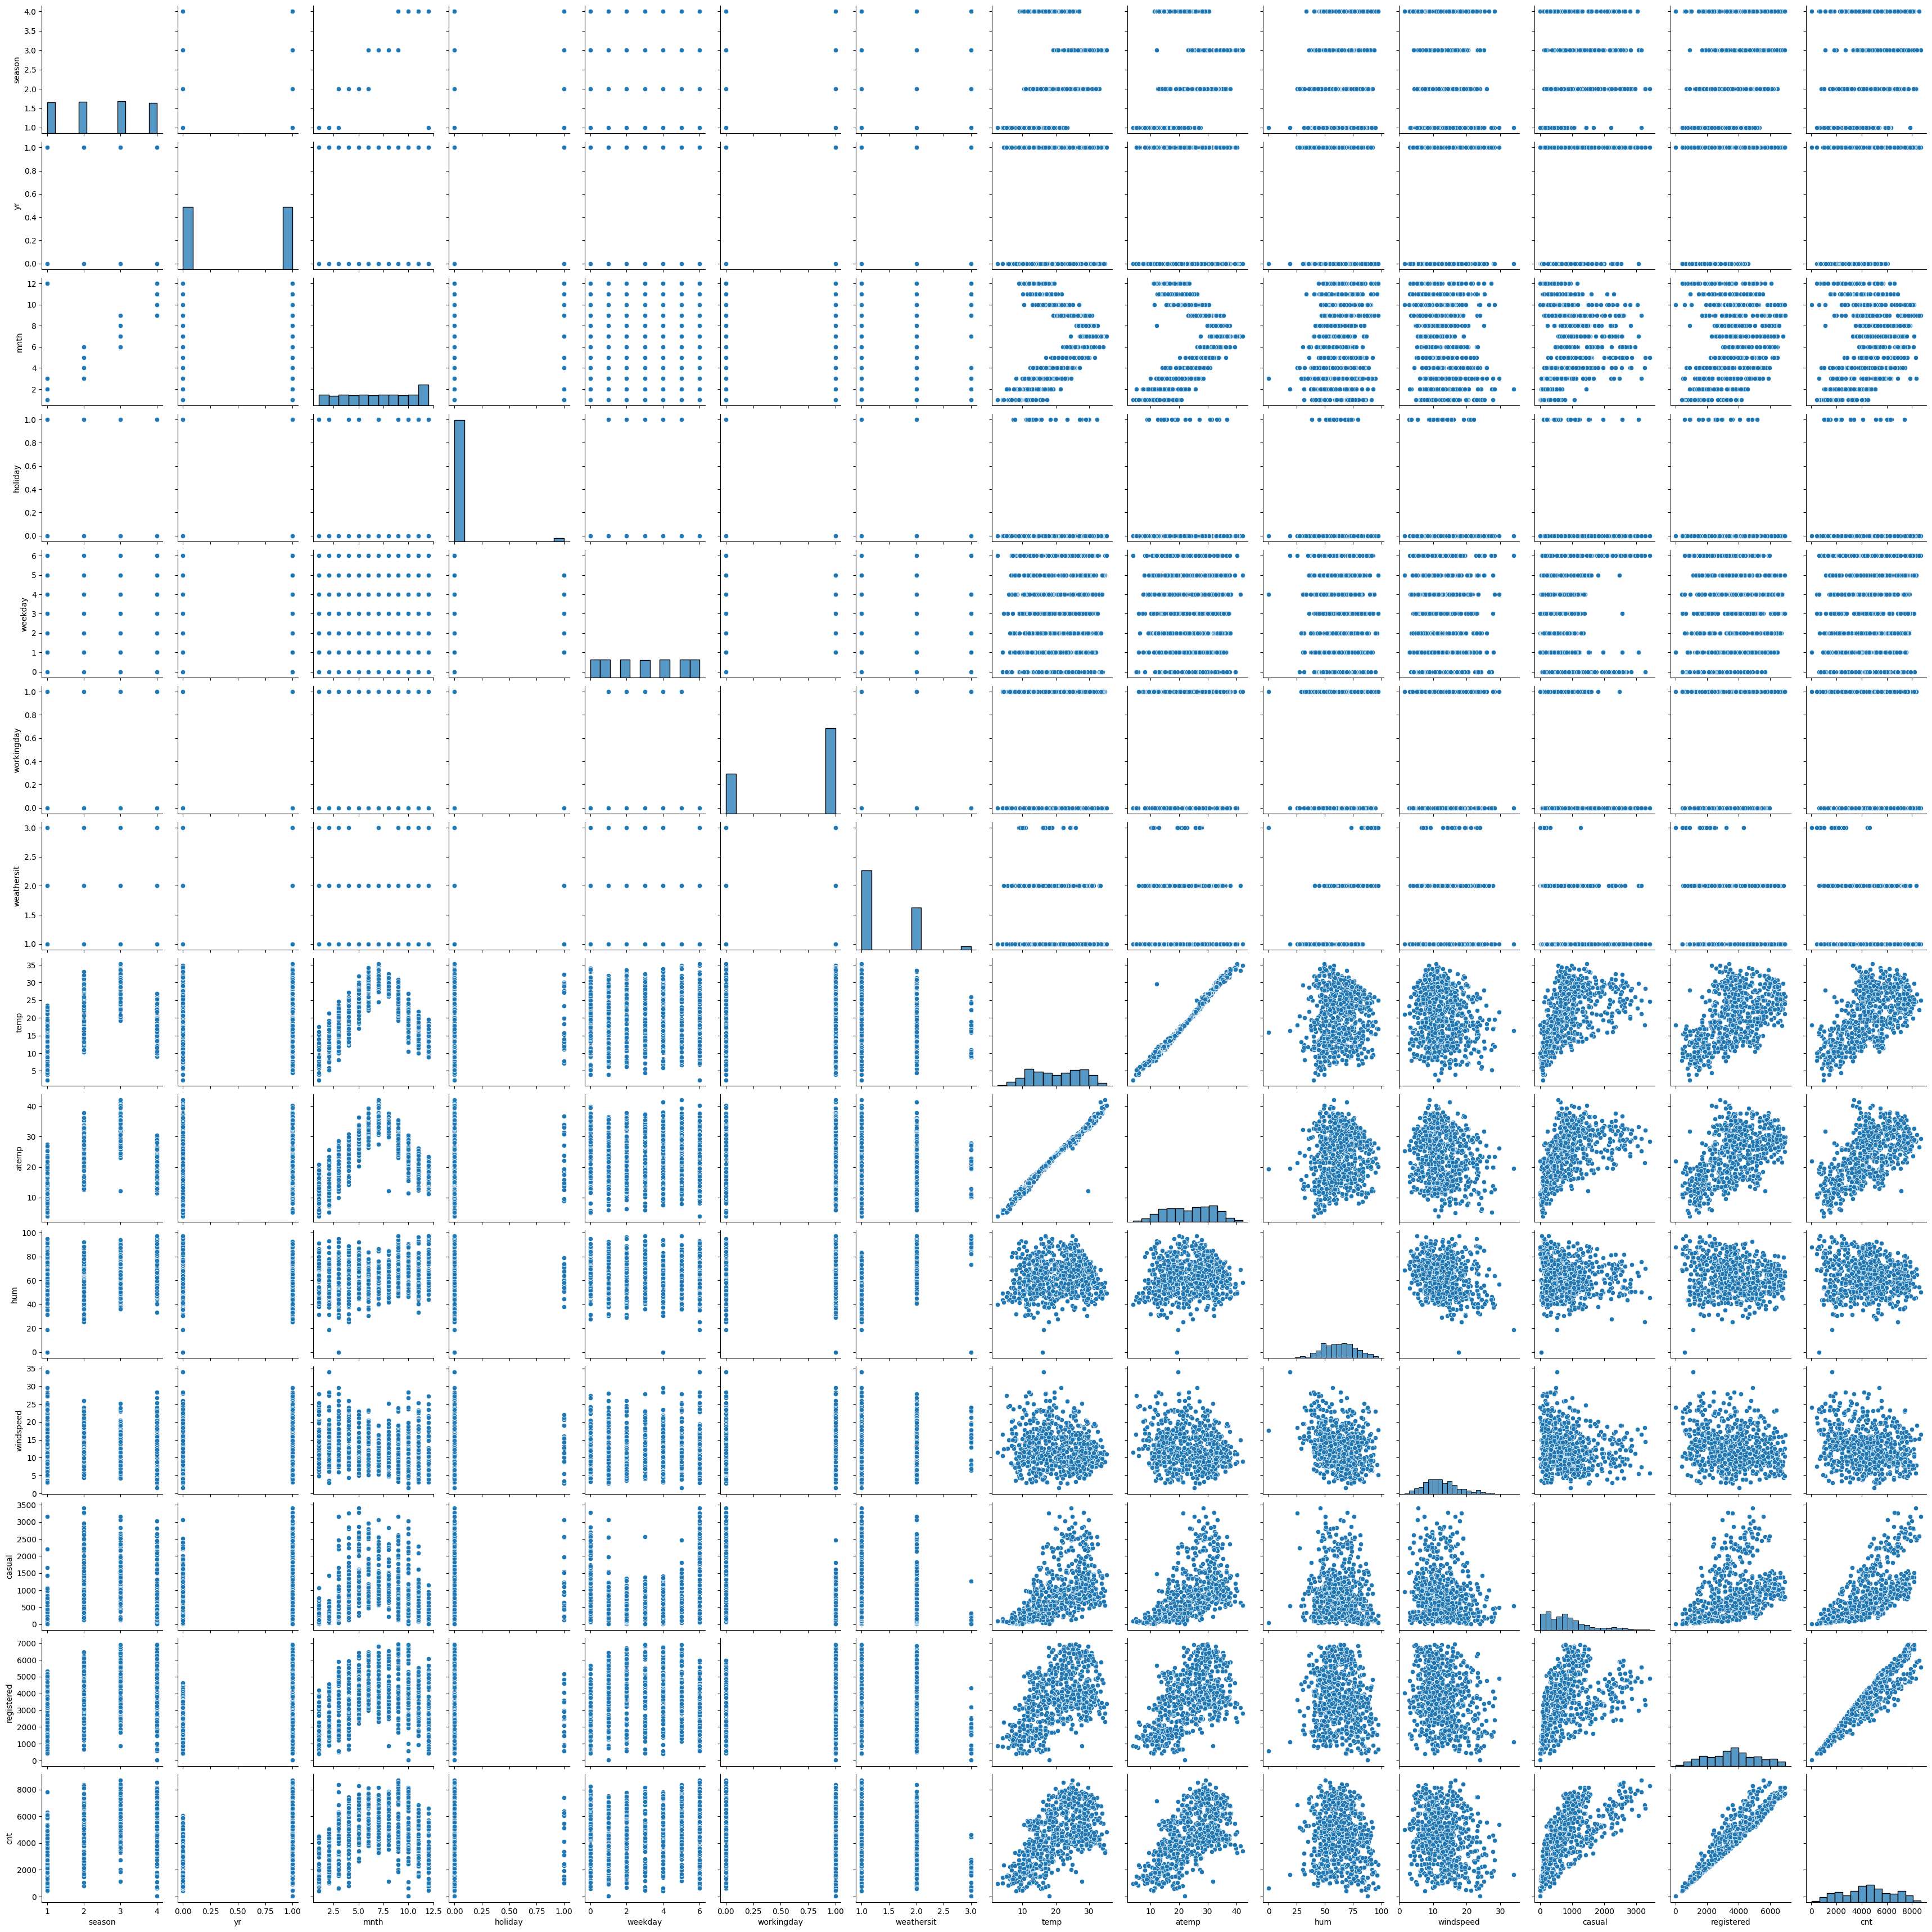

In [182]:
plt.figure(figsize=(15,10))
sns.pairplot(df)
plt.show()

pairplots to verify a linear connection

<Figure size 1500x1000 with 0 Axes>

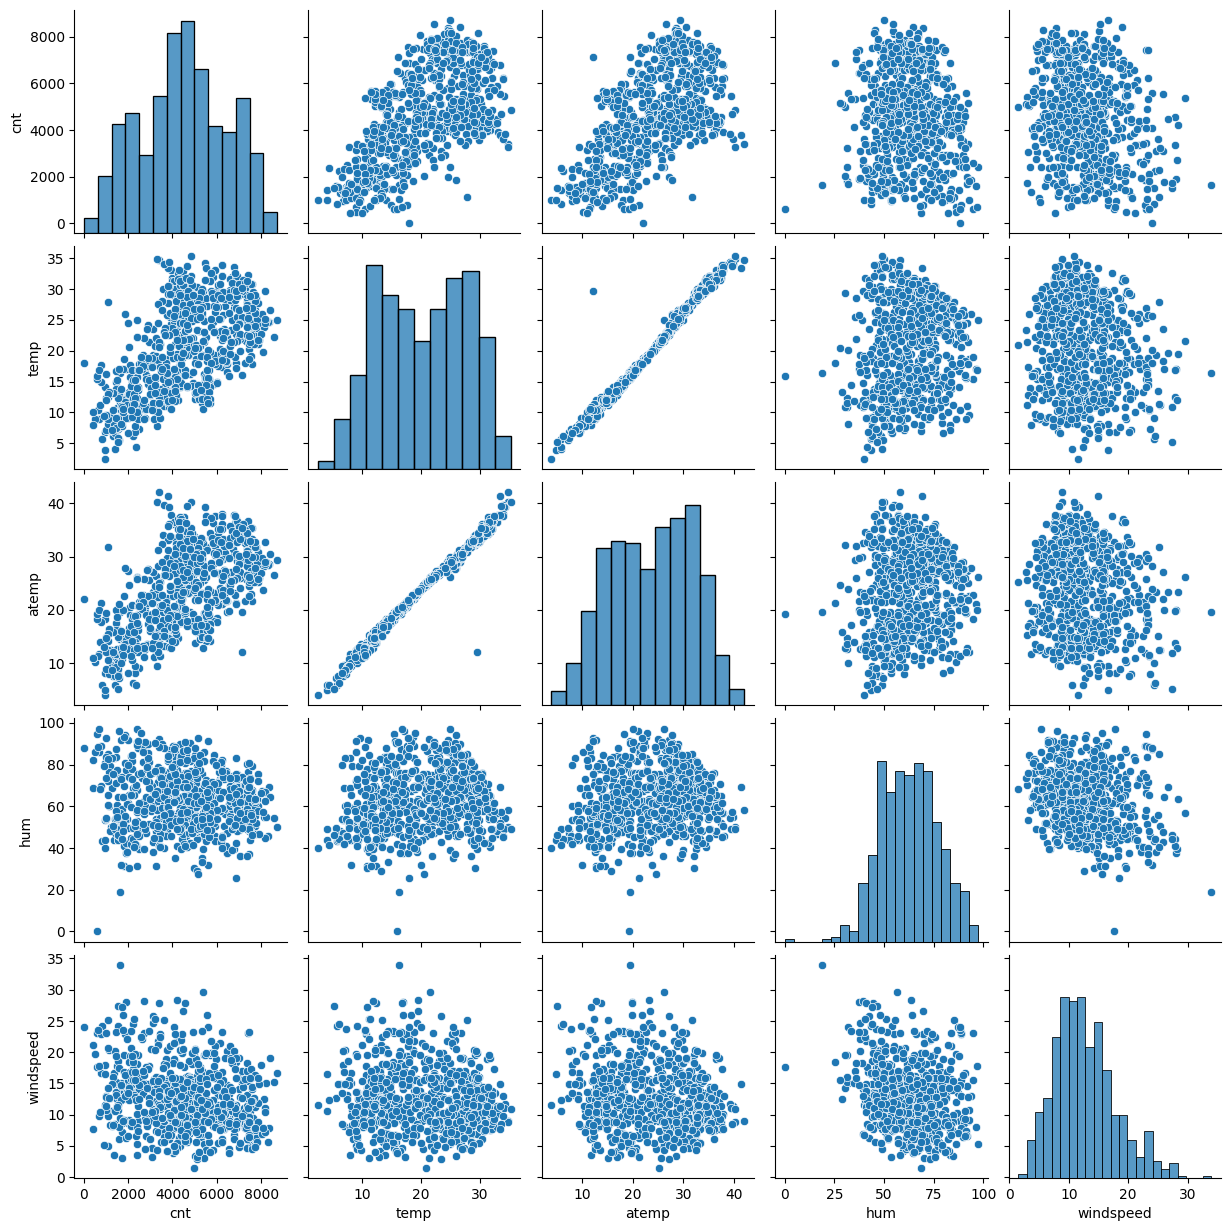

In [183]:
plt.figure(figsize=(15,10))
sns.pairplot(df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

Above the plots show temp and atemp have high correlation  and also  linear relation between them

##heatmap showing how numerical variables are correlated

In [184]:

df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

df.mnth = df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

df.weekday = df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thurs',5: 'fri',6: 'sat'})
df.head()


season  yr mnth  holiday weekday  workingday weathersit       temp  \
0  spring   0  jan        0     sat           0   moderate  14.110847   
1  spring   0  jan        0     sun           0   moderate  14.902598   
2  spring   0  jan        0     mon           1       good   8.050924   
3  spring   0  jan        0     tue           1       good   8.200000   
4  spring   0  jan        0     wed           1       good   9.305237   

      atemp      hum  windspeed  casual  registered   cnt  
0  18.18125  80.5833  10.749882     331         654   985  
1  17.68695  69.6087  16.652113     131         670   801  
2   9.47025  43.7273  16.636703     120        1229  1349  
3  10.60610  59.0435  10.739832     108        1454  1562  
4  11.46350  43.6957  12.522300      82        1518  1600

### Heatmap for correlation between numeric variables

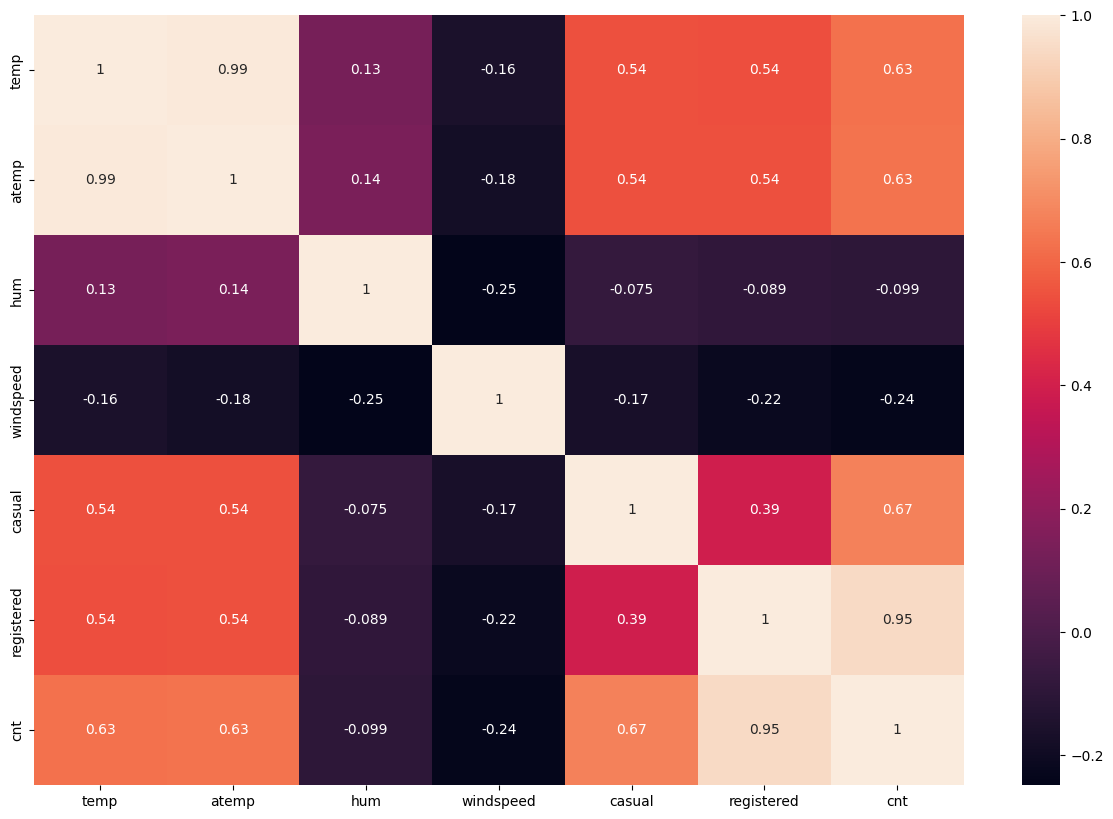

In [187]:
plt.figure(figsize=(15,10))
sns.heatmap(df[['temp', 'atemp', 'hum', 'windspeed','casual', 'registered', 'cnt']].corr(),annot=True) # Select only numerical columns for correlation calculation.
plt.show()

###visualising the categorical variables

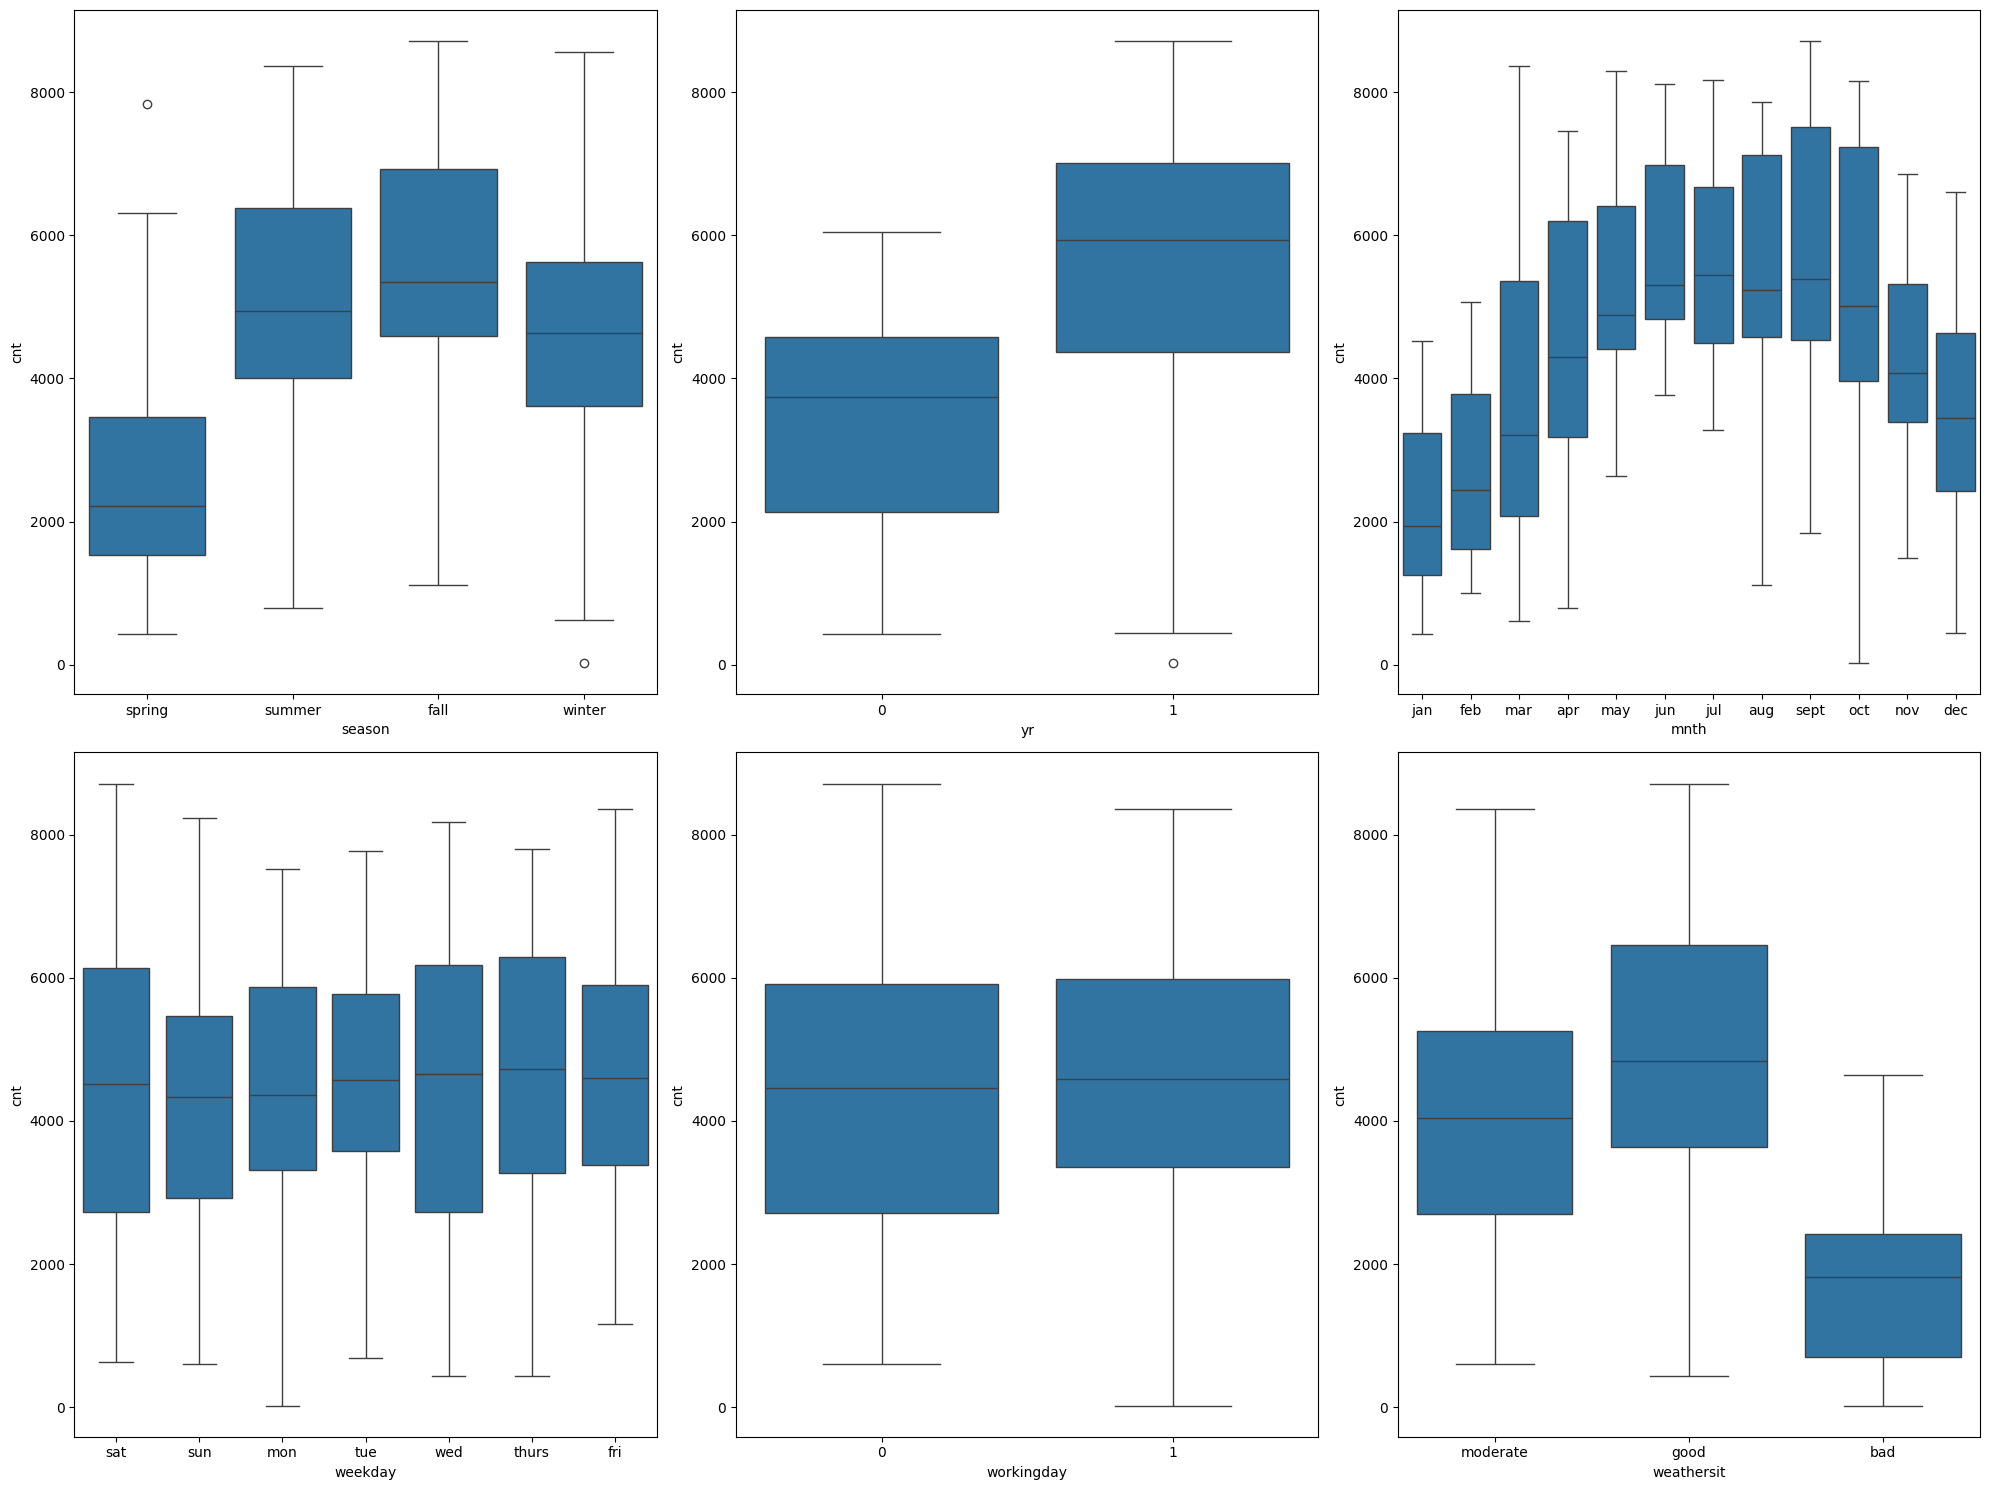

In [194]:

fig, axes = plt.subplots(2, 3, figsize=(20, 15))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# List of categorical features to plot
cat_features = ['season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit']

# Create boxplots for each categorical feature
for i, feature in enumerate(cat_features):
    sns.boxplot(x=feature, y='cnt', data=df, ax=axes[i])

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

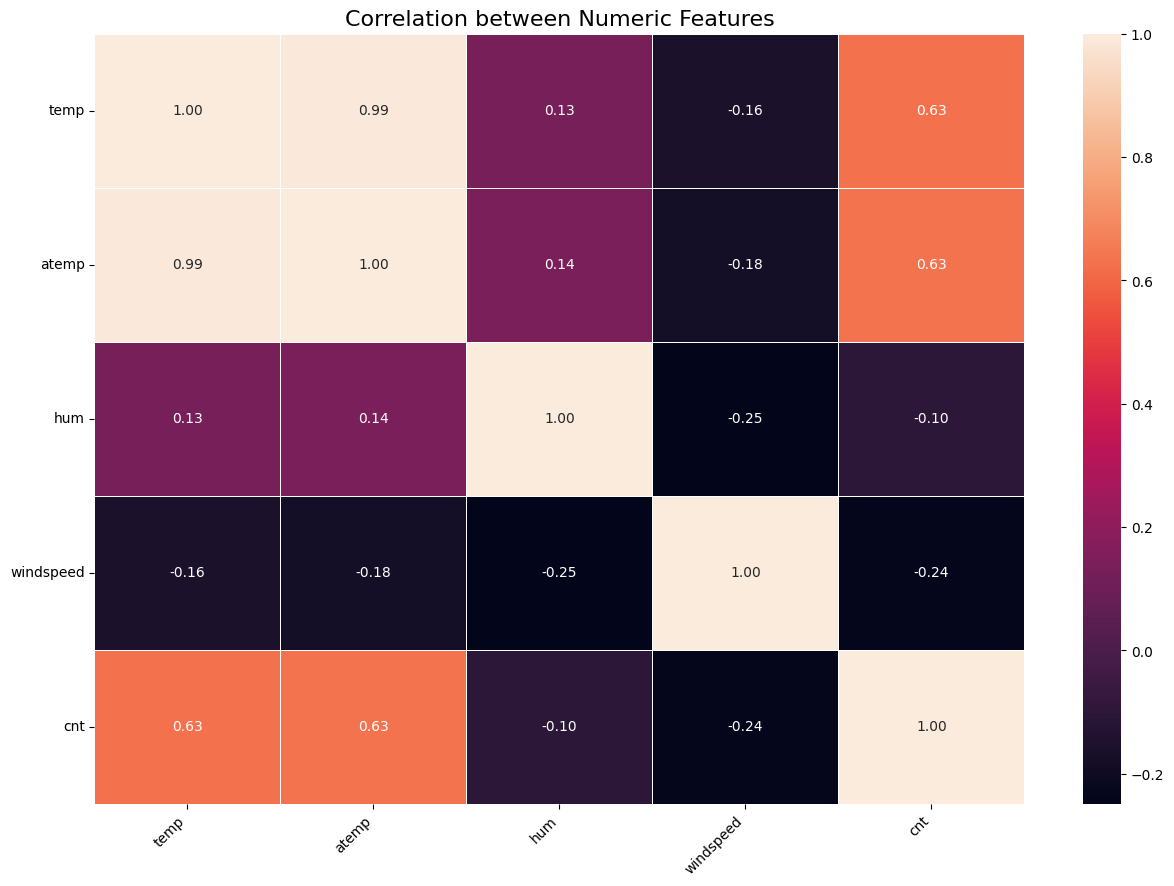

In [192]:


num_features = ["temp", "atemp", "hum", "windspeed", "cnt"]

# Calculate correlation matrix
corr_matrix = df[num_features].corr()  # Use df if bike_df is not defined

# Create heatmap using seaborn
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=.5)

# Customize plot
plt.title("Correlation between Numeric Features", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Display the plot
plt.show()

In [196]:
df.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.500000    0.028767    0.683562   20.319259   23.726322   62.765175   
std      0.500343    0.167266    0.465405    7.506729    8.150308   14.237589   
min      0.000000    0.000000    0.000000    2.424346    3.953480    0.000000   
25%      0.000000    0.000000    0.000000   13.811885   16.889713   52.000000   
50%      0.500000    0.000000    1.000000   20.465826   24.368225   62.625000   
75%      1.000000    0.000000    1.000000   26.880615   30.445775   72.989575   
max      1.000000    1.000000    1.000000   35.328347   42.044800   97.250000   

        windspeed       casual   registered          cnt  
count  730.000000   730.000000   730.000000   730.000000  
mean    12.763620   849.249315  3658.757534  4508.006849  
std      5.195841   686.479875  1559.758728  1936.011647  
min      1.500244     2.000000    20.000000    22.000000  
25%      9.041650   316.250000  2502.250000  3169.750000  
50%     12.125325   717.000000  3664.500000  4548.500000  
75%     15.625589  1096.500000  4783.250000  5966.000000  
max     34.000021  3410.000000  6946.000000  8714.000000

# Preparing data for linear regression

In [197]:
df = pd.get_dummies(data=df,columns=["season","mnth","weekday"],drop_first=True)
df = pd.get_dummies(data=df,columns=["weathersit"])

In [198]:
df.head()

yr  holiday  workingday       temp     atemp      hum  windspeed  casual  \
0   0        0           0  14.110847  18.18125  80.5833  10.749882     331   
1   0        0           0  14.902598  17.68695  69.6087  16.652113     131   
2   0        0           1   8.050924   9.47025  43.7273  16.636703     120   
3   0        0           1   8.200000  10.60610  59.0435  10.739832     108   
4   0        0           1   9.305237  11.46350  43.6957  12.522300      82   

   registered   cnt  ...  mnth_sept  weekday_mon  weekday_sat  weekday_sun  \
0         654   985  ...      False        False         True        False   
1         670   801  ...      False        False        False         True   
2        1229  1349  ...      False         True        False        False   
3        1454  1562  ...      False        False        False        False   
4        1518  1600  ...      False        False        False        False   

   weekday_thurs  weekday_tue  weekday_wed  weathersit_bad  weathersit_good  \
0          False        False        False           False            False   
1          False        False        False           False            False   
2          False        False        False           False             True   
3          False         True        False           False             True   
4          False        False         True           False             True   

   weathersit_moderate  
0                 True  
1                 True  
2                False  
3                False  
4                False  

[5 rows x 33 columns]

In [199]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'season_spring', 'season_summer',
       'season_winter', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'mnth_sept', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thurs', 'weekday_tue', 'weekday_wed', 'weathersit_bad',
       'weathersit_good', 'weathersit_moderate'],
      dtype='object')

**Train and Test Data**

In [200]:
df.shape

(730, 33)

In [201]:
import sklearn
from sklearn.model_selection import train_test_split

In [202]:
y=df.pop('cnt')
X=df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [203]:
X.head()

yr  holiday  workingday       temp     atemp      hum  windspeed  casual  \
0   0        0           0  14.110847  18.18125  80.5833  10.749882     331   
1   0        0           0  14.902598  17.68695  69.6087  16.652113     131   
2   0        0           1   8.050924   9.47025  43.7273  16.636703     120   
3   0        0           1   8.200000  10.60610  59.0435  10.739832     108   
4   0        0           1   9.305237  11.46350  43.6957  12.522300      82   

   registered  season_spring  ...  mnth_sept  weekday_mon  weekday_sat  \
0         654           True  ...      False        False         True   
1         670           True  ...      False        False        False   
2        1229           True  ...      False         True        False   
3        1454           True  ...      False        False        False   
4        1518           True  ...      False        False        False   

   weekday_sun  weekday_thurs  weekday_tue  weekday_wed  weathersit_bad  \
0        False          False        False        False           False   
1         True          False        False        False           False   
2        False          False        False        False           False   
3        False          False         True        False           False   
4        False          False        False         True           False   

   weathersit_good  weathersit_moderate  
0            False                 True  
1            False                 True  
2             True                False  
3             True                False  
4             True                False  

[5 rows x 32 columns]

In [212]:

print(X_train.shape)
print(X_test.shape)

(511, 32)
(219, 32)


In [213]:
from sklearn.preprocessing import StandardScaler

num_vars = ['temp','atemp','hum','windspeed']

#scale using the standard scaler
scaler = StandardScaler()

#fit and trasnform
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [214]:
X_train.describe()

yr     holiday  workingday          temp         atemp  \
count  511.000000  511.000000  511.000000  5.110000e+02  5.110000e+02   
mean     0.520548    0.027397    0.669276  1.703356e-16 -1.042871e-17   
std      0.500067    0.163398    0.470935  1.000980e+00  1.000980e+00   
min      0.000000    0.000000    0.000000 -2.426671e+00 -2.474620e+00   
25%      0.000000    0.000000    0.000000 -8.662834e-01 -8.145566e-01   
50%      1.000000    0.000000    1.000000  1.076170e-01  1.728600e-01   
75%      1.000000    0.000000    1.000000  8.554967e-01  8.077908e-01   
max      1.000000    1.000000    1.000000  1.978457e+00  2.225353e+00   

                hum     windspeed       casual   registered  
count  5.110000e+02  5.110000e+02   511.000000   511.000000  
mean   3.476236e-17  1.373113e-16   858.600783  3694.350294  
std    1.000980e+00  1.000980e+00   672.706953  1573.398840  
min   -4.558466e+00 -2.237274e+00     9.000000   416.000000  
25%   -7.635563e-01 -7.168956e-01   336.500000  2628.000000  
50%    4.018002e-02 -1.625414e-01   738.000000  3729.000000  
75%    7.163583e-01  6.018668e-01  1094.500000  4804.000000  
max    2.409813e+00  3.155398e+00  3252.000000  6946.000000

In [215]:
X_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  casual  \
683   1        0           1 -0.985606 -0.960523 -0.103434  -0.473324     320   
645   1        1           0 -0.647121 -0.571139  0.536841   0.022275     874   
163   0        0           1  0.734280  0.749386 -1.007011   1.584643     863   
360   0        0           1 -0.967311 -0.941145  0.916822   0.005675     103   
640   1        0           1  0.857783  0.733833  1.141219  -1.640885     728   

     registered  season_spring  ...  mnth_sept  weekday_mon  weekday_sat  \
683        5125          False  ...      False        False        False   
645        4604          False  ...      False         True        False   
163        4157          False  ...      False         True        False   
360        1059           True  ...      False        False        False   
640        6844          False  ...      False        False        False   

     weekday_sun  weekday_thurs  weekday_tue  weekday_wed  weathersit_bad  \
683        False           True        False        False           False   
645        False          False        False        False           False   
163        False          False        False        False           False   
360        False          False         True        False           False   
640        False          False        False         True           False   

     weathersit_good  weathersit_moderate  
683            False                 True  
645            False                 True  
163             True                False  
360            False                 True  
640            False                 True  

[5 rows x 32 columns]

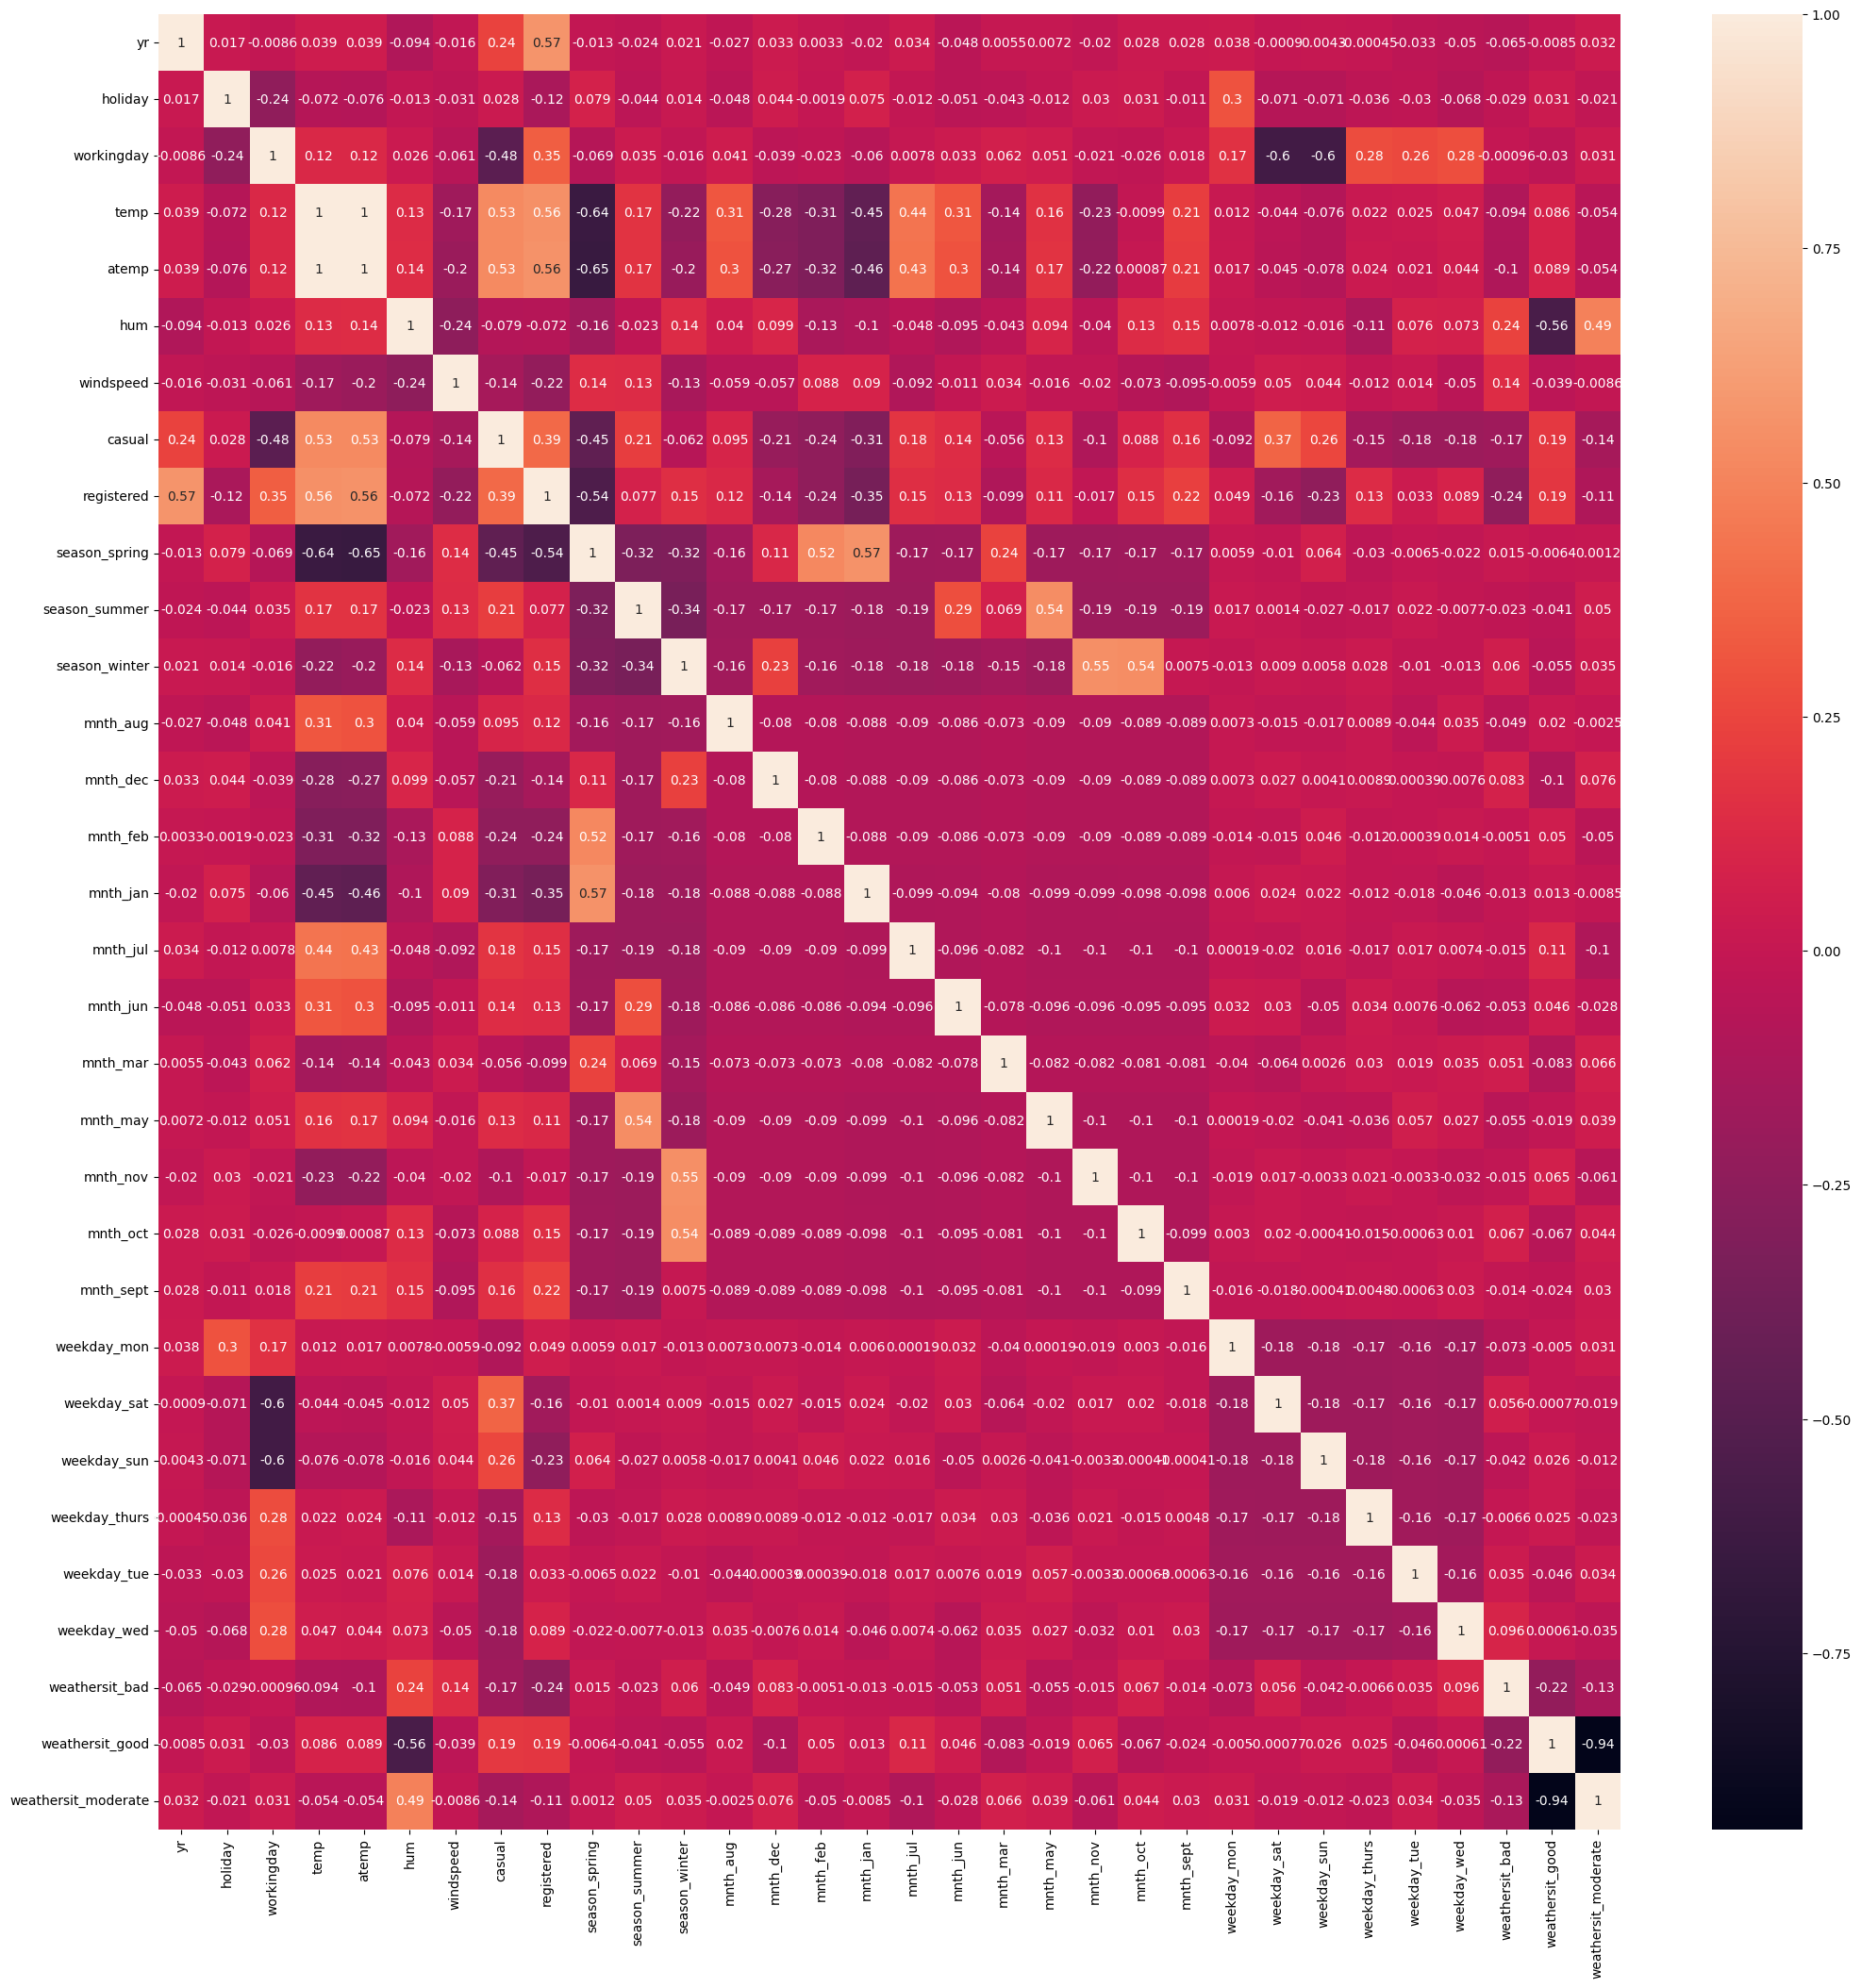

In [222]:
plt.figure(figsize = (25, 25))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

# RFE Model Building

In [224]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [228]:
from sklearn.feature_selection import RFE

rfe = RFE(lr, n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

### creating a function for statsmodel api model building

In [242]:
def check_for_non_numeric(df):
  non_numeric_cols = df.select_dtypes(include=['object']).columns.tolist()
  return non_numeric_cols



In [268]:
check_for_non_numeric(X_train)

[]

In [266]:
import statsmodels.api as sm
# Ensure all columns in X_train and y_train are numeric.
# Convert to numeric types if necessary (e.g., using .astype(float)).
X_train = X_train.apply(pd.to_numeric, errors='coerce')
y_train = y_train.apply(pd.to_numeric, errors='coerce')

def ModelBuling(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

###Function to compute and print VIFs; requires as a parameter the columns for which the VIF is to be computed.

In [267]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def getVif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    print(vif.sort_values(by='VIF', ascending=False))

In [230]:
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'atemp', 'windspeed', 'casual', 'registered',
       'mnth_dec', 'mnth_jul', 'mnth_jun', 'mnth_mar', 'weekday_mon',
       'weekday_sun', 'weekday_wed', 'weathersit_moderate'],
      dtype='object')

In [231]:
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']]

In [232]:
X_train_rfe.shape

(511, 15)

# Models

####First Model - all columns selected by RFE

In [253]:
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

ModelBuling(cols)
getVif(cols)

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [255]:
bool_cols = X_train.select_dtypes(include='bool').columns

# Convert boolean columns to numeric type
X_train[bool_cols] = X_train[bool_cols].astype(int)

In [270]:
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

ModelBuling(cols)
getVif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     167.9
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          4.52e-183
Time:                        07:36:09   Log-Likelihood:                -4131.1
No. Observations:                 511   AIC:                             8294.
Df Residuals:                     495   BIC:                             8362.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3336.4878    

### second model -Rebuilding the model by Eliminating 'humidity'


In [271]:
##Eliminating the variable "hum" because of its high p-value and negative coefficient of insignificance
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter','mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
ModelBuling(cols)
getVif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     172.9
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          1.72e-180
Time:                        07:36:15   Log-Likelihood:                -4140.0
No. Observations:                 511   AIC:                             8310.
Df Residuals:                     496   BIC:                             8374.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3418.0751    

### Third model - Rebuilding the model by Eliminating 'JAN'

In [272]:
#Dropping the variable mnth_jan  as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
ModelBuling(cols)
getVif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          3.59e-184
Time:                        07:36:19   Log-Likelihood:                -4131.2
No. Observations:                 511   AIC:                             8292.
Df Residuals:                     496   BIC:                             8356.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3331.4970    

### Fourth Model- Rebuilding the model by Eliminating 'holiday'

In [273]:
# eliminating the holiday
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
ModelBuling(cols)
getVif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     200.9
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          4.56e-182
Time:                        07:36:23   Log-Likelihood:                -4141.7
No. Observations:                 511   AIC:                             8309.
Df Residuals:                     498   BIC:                             8364.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3352.3877    

### fifth Model - Rebuilding the model by Eliminating 'july'

In [265]:
# eleminating the july

cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
ModelBuling(cols)
getVif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     217.9
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          1.57e-182
Time:                        07:33:37   Log-Likelihood:                -4143.4
No. Observations:                 511   AIC:                             8311.
Df Residuals:                     499   BIC:                             8362.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3238.7306    

###Sixth Model- Rebuilding the model by replacing july with spring

In [276]:
# replacing july with spring becouse both are highly  correlated
cols_6= ['yr','season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate','temp']
ModelBuling(cols)
getVif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     251.1
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          2.33e-179
Time:                        07:44:54   Log-Likelihood:                -4156.6
No. Observations:                 511   AIC:                             8333.
Df Residuals:                     501   BIC:                             8376.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4007.4894    

* In this case, all VIFs are below 5, which indicates that there is no significant multicollinearity in the model.
* R2 is 0.82 and the p-value is about 0.0 for all the characteristics. Thus, we complete this model for future use.




Building the final model

In [277]:
lr = lr.fit(X_train[cols_6],y_train)
print(lr.intercept_,lr.coef_)

4007.4894254285664 [ 2001.88568746 -1170.12801426  -482.89359595   494.76805882
   483.00061976  -335.8335287  -2305.32363933  -665.38449026
   889.35768593]


**Residual Analysis**

In [279]:
y_train_pred = lr.predict(X_train[cols_6])

<ipython-input-280-d95325be2d31>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=y_train-y_train_pred)


<Axes: ylabel='Density'>

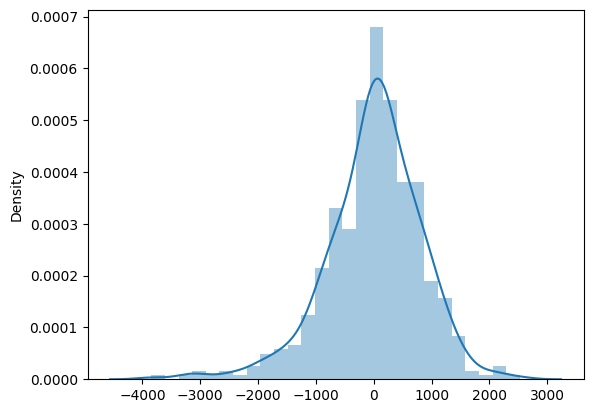

In [280]:
sns.distplot(x=y_train-y_train_pred)

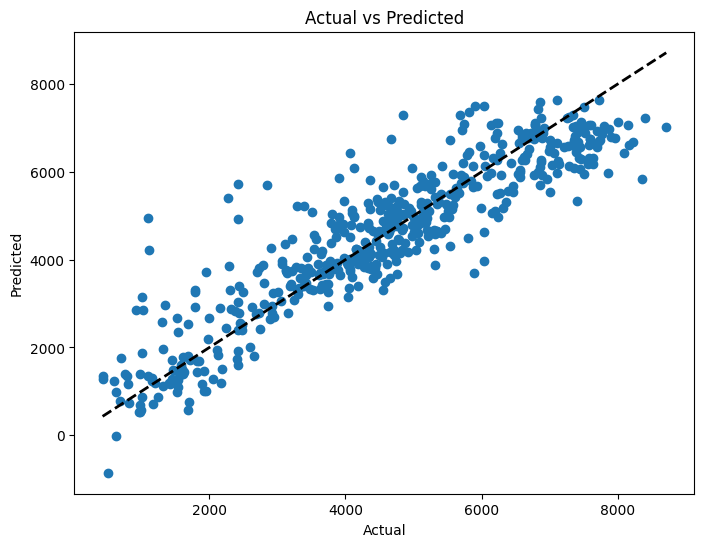

In [282]:
#Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_train, y_train_pred)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

### R-squared value for train predictions in the model

In [284]:
from sklearn.metrics import r2_score

r2_score(y_train,y_train_pred)

0.8185359364498817

In [302]:
Adj_r2=1-(1-0.8185359364498817)*(11-1)/(11-1-1)
print(Adj_r2)

0.7983732627220907


Value prediction on a test dataset

In [286]:
X_test[['temp', 'atemp', 'hum', 'windspeed']] = scaler.transform(X_test[['temp', 'atemp', 'hum', 'windspeed']])

In [287]:
y_test_pred = lr.predict(X_test[['yr','season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate','temp']])

R-Squared value test prediction

In [288]:
r2_score(y_test,y_test_pred)

0.8159036088393239

In [301]:
Adj_r2=1-(1-0.8159036088393239)*(11-1)/(11-1-1)
print(Adj_r2)

0.7954484542659155


**Model Evaluation**

In [289]:
y_pred=y_test_pred
r2_score(y_test, y_pred)

0.8159036088393239

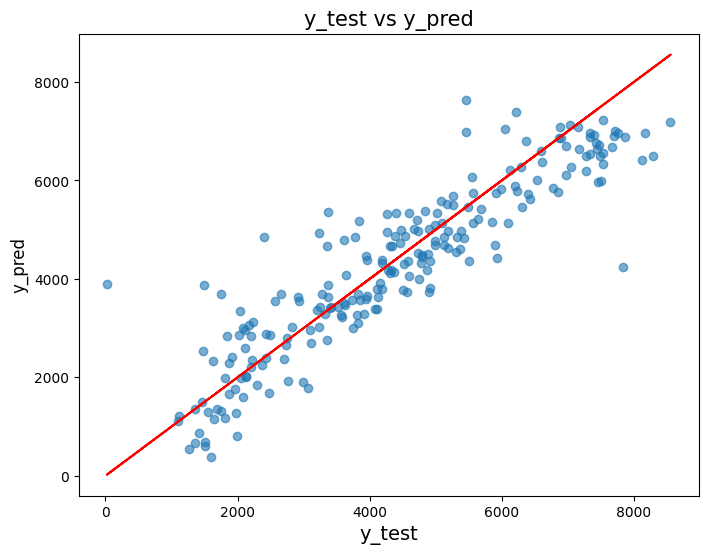

In [291]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot(y_test, y_test, color='red')
plt.title('y_test vs y_pred', fontsize=15)
plt.xlabel('y_test', fontsize=14)
plt.ylabel('y_pred', fontsize=12)
plt.show()

# Results

In [307]:


r2_difference = 0.8185359364498817 - 0.8159036088393239
print(f"Difference in R^2: {r2_difference}")

Difference in R^2: 0.002632327610557761


In [309]:
adj_r2_difference = 0.7983732627220907 - 0.7954484542659155
print(f"Difference in adj R^2: {adj_r2_difference}")

Difference in adj R^2: 0.002924808456175265


**Interpretation**

With the important variables taken into account, we were able to develop a pretty good model for the demand for shared bikes. As we can see, the temperature variable has the highest coefficient, meaning that for every unit rise in temperature, there will be  increase in the number of bike rentals.
The coefficients of other variables are also visible in the best-fit line equation.

Additionally, we observe that certain variables have negative coefficients. A negative coefficient indicates a tendency for the dependent variable to drop as the independent variable rises. We have springtime factors with a negative coefficient: misty, foggy, light snow. The coefficient value shows how much, while leaving other variables constant, the mean of the dependent variable varies with a one-unit movement in the independent variable.

BUSINESS GOAL:

Can concentrate more on the summer and winter seasons, the months of August and September, the weekends, and workdays, as these have a positive impact on bike rentals.
- It is evident that the springtime has a negative correlation with bike rentals and negative coefficients. So that we can raise the demand there, we can make certain deals.

- With regard to the weathersit variable, mist + cloudy and light snow weather have negative coefficients. Indeed, we are able to make offers.